# NEW YORK TAXI FARE

<img src='img/taxi_fare.PNG' width=2000>

Nesta aula, vamos trabalhar com dados de corridas de taxi em Nova York através de um dataSet consagrado em estudos que vão desde a Coursera e Google Coud até o Kaggle. O objetivo será identificar a série de dados do _fare amount_ (valor da corrida de taxi) como variável target, e construir séries de dados que possam explicar estes valores. Para isso, teremos que manipular os dados existentes conforme descrito abaixo, com o intuito de obter uma regressão explicativa para os valores cobrados por este serviço de transporte.

### Descrições de arquivo

- train.csv - Recursos de entrada e valores de fare_amount de destino para o conjunto de treinamento (cerca de 55 milhões de linhas).
- test.csv - Recursos de entrada para o conjunto de testes (cerca de 10 mil linhas).
- sample_submission.csv - um arquivo de envio de amostra no formato correto (keys key e fare_amount). Este arquivo 'prevê' fare_amount para $ 11.35 para todas as linhas, que é a média de fare_amount do conjunto de treinamento.

#### Para baixar os arquivos acesse o link [clicando aqui](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/data)

### Campos de dados

1.Variável de Identidade

- key - string única que identifica cada linha nos conjuntos de treinamento e teste.

2.Variáveis Explicativas

- pickup_datetime - valor do registro de data e hora indicando quando o taxi começou.
- pickup_longitude - flutua pela coordenada de longitude de onde o taxi começou.
- pickup_latitude - flutua para a coordenada de latitude de onde o táxi começou.
- dropoff_longitude - flutua pela coordenada de longitude de onde o passeio de táxi terminou.
- dropoff_latitude - flutua para a coordenada de latitude de onde o passeio de táxi terminou.
- passenger_count - número inteiro indicando o número de passageiros no trajeto de táxi.

3.Variável Alvo

- fare_amount - valor em dólar flutuante do custo do táxi. Este valor é apenas no conjunto de treinamento; isso é o que você está prevendo no conjunto de testes e é necessário em seu envio CSV.

Para esta DataSet, faremos algumas operações que tem por objetivo explicar o preço da corrida de taxi, separado em seções:

- Cleaning Data
- Análise Exploratória de Dados
- Modelagem Estatística
- Regressão Linear
- Avançado

# Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from collections import Counter
from sklearn import preprocessing
from datetime import datetime
import ast
from sklearn.preprocessing import StandardScaler

# Lendo e verificando os dados

In [2]:
df = pd.read_csv("../../02 Analise Exploratoria Inter/05 Modelagem Estatistica 2/train.csv", nrows = 1000000)
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
key                  1000000 non-null object
fare_amount          1000000 non-null float64
pickup_datetime      1000000 non-null object
pickup_longitude     1000000 non-null float64
pickup_latitude      1000000 non-null float64
dropoff_longitude    999990 non-null float64
dropoff_latitude     999990 non-null float64
passenger_count      1000000 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 61.0+ MB


In [3]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


# Entendendo a explicabilidade do DataSet (benchmark)

Rodar uma regressão linear no início da análise exploratória de dados nos permite entender o quão explicativas são as variáveis independentes iniciais, que servirá como referência ao final da nossa análise

In [4]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [5]:
# rodando uma regressão inicial para servir de benchmark para a análise

formula = 'fare_amount ~ pickup_longitude + pickup_latitude + dropoff_longitude + dropoff_latitude + passenger_count'

result = sm.ols(formula, data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     53.55
Date:                Mon, 27 May 2019   Prob (F-statistic):           8.61e-56
Time:                        13:56:31   Log-Likelihood:            -3.7034e+06
No. Observations:              999990   AIC:                         7.407e+06
Df Residuals:                  999984   BIC:                         7.407e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            11.8604      0.06

Podemos verificar que não existe relação nenhuma contida nas variáveis independentes que possam explicar as taxas de corridas de taxi cobradas.

# CLEANING DATA

Para melhor entendimento no processamento das colunas do DataSet, precisamos entender os valores que estão contidos em cada coluna e como faremos para confiar nos dados, ou seja, para estarmos seguros de que os números nas colunas são coerentes e estão dentro de um intervalo esperado.

In [6]:
# Contagem de valores nulos
df.isnull().sum().sort_values(ascending=False)

dropoff_latitude     10
dropoff_longitude    10
passenger_count       0
pickup_latitude       0
pickup_longitude      0
pickup_datetime       0
fare_amount           0
key                   0
dtype: int64

## Eliminando os valores nulos

In [7]:
# Dropando 10 observações com dados nulos
df = df.drop(df[df.isnull().any(1)].index, axis = 0)

In [8]:
df.shape

(999990, 8)

## Verificando a variável alvo fare_amount

In [9]:
df['fare_amount'].describe()

count    999990.000000
mean         11.347953
std           9.821790
min         -44.900000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

In [10]:
from collections import Counter
Counter(df['fare_amount']<0)

Counter({False: 999952, True: 38})

Descobrimos que existem 38 valores negativos de _fare amount_ - como não podemos ter taxas de cobrança de corrida de taxi negativa, vamos eliminar estas linhas

In [11]:
# Dropando 38 colunas com taxa de corrida negativa
df = df.drop(df[df['fare_amount']<0].index, axis=0)
df.shape

(999952, 8)

In [12]:
df['fare_amount'].describe()

count    999952.000000
mean         11.348616
std           9.821249
min           0.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

In [13]:
df['fare_amount'].sort_values(ascending=False).nlargest(10)

101885    500.00
247671    495.00
287638    450.00
233874    450.00
329010    450.00
361793    400.00
451974    400.00
951810    347.54
578919    287.08
130460    281.05
Name: fare_amount, dtype: float64

## Verificando a variável passenger_count

In [14]:
df['passenger_count'].describe()


count    999952.000000
mean          1.684942
std           1.323908
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

In [15]:
df['passenger_count'].sort_values(ascending=False).nlargest(5)

929022    208
641618      6
438863      6
13777       6
133285      6
Name: passenger_count, dtype: int64

In [16]:
df[df['passenger_count']>6]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
929022,2009-07-30 11:54:00.000000193,3.3,2009-07-30 11:54:00 UTC,0.0,0.0,0.0,0.0,208


Descobrimos que temos uma observação com 208 passageiros - vamos eliminar esta linha e ficar com um máximo de 6 passageiros por corrida.

In [17]:
# Dropando uma linha com 608 passageiros
df = df.drop(df[df['passenger_count']==208].index, axis = 0)

In [18]:
df['passenger_count'].describe()

count    999951.000000
mean          1.684736
std           1.307733
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64

## Verificando as variáveis de latitude

A latitude é um ângulo (definido abaixo) que varia de 0 ° no equador a 90 ° (norte ou sul) nos pólos. Linhas de latitude constante, ou paralelos, correm de leste a oeste como círculos paralelos ao equador. A latitude é usada junto com a longitude para especificar a localização precisa dos recursos na superfície da Terra.

Isso significa de não podemos ter valores de latitude menores que -90 e maiores que 90.

### pickup_latitude

In [19]:
df['pickup_latitude'].describe()

count    999951.000000
mean         39.929090
std           7.626025
min       -3116.285383
25%          40.734965
50%          40.752695
75%          40.767154
max        2621.628430
Name: pickup_latitude, dtype: float64

In [20]:
df[df['pickup_latitude']<-90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
150559,2012-08-03 07:43:00.000000176,25.3,2012-08-03 07:43:00 UTC,0.000000,-3116.285383,-73.953600,40.787998,1
436233,2012-03-11 01:56:00.000000100,4.1,2012-03-11 01:56:00 UTC,-2986.242495,-880.627428,-3383.296608,-2559.748913,1
543001,2011-10-28 13:53:00.000000178,5.3,2011-10-28 13:53:00 UTC,-3377.680935,-113.019497,-554.918693,314.794180,1


In [21]:
df[df['pickup_latitude']>90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5686,2011-07-30 11:15:00.00000082,3.3,2011-07-30 11:15:00 UTC,-73.947235,401.083332,-73.951392,40.778927,1
174356,2011-11-21 21:36:00.00000081,9.7,2011-11-21 21:36:00 UTC,2140.601160,1703.092772,-1251.195890,-1189.615440,1
272439,2011-04-23 02:55:00.00000012,9.3,2011-04-23 02:55:00 UTC,-74.002497,405.350000,-73.978600,40.739962,1
464025,2012-03-05 20:58:00.0000009,6.9,2012-03-05 20:58:00 UTC,-73.994268,404.966667,-73.973857,40.755457,1
505229,2012-03-05 21:08:00.0000006,9.3,2012-03-05 21:08:00 UTC,-73.994268,404.966667,-73.986387,40.776895,1
505583,2012-03-16 08:13:00.000000272,8.5,2012-03-16 08:13:00 UTC,-73.994277,405.133332,-73.956763,40.783737,1
688685,2012-03-22 21:40:00.000000188,17.3,2012-03-22 21:40:00 UTC,2522.271325,2621.628430,-1718.117653,-2864.471003,1
708059,2012-05-24 22:44:00.00000088,5.3,2012-05-24 22:44:00 UTC,-73.989188,91.266667,-73.982362,40.763105,1
970268,2012-04-12 07:31:00.00000027,5.7,2012-04-12 07:31:00 UTC,-73.957087,424.083332,-73.968312,40.765117,1


Percebemos que temos 3 observações com valores menores que -90 e 9 observações com valores maiores que 90 - vamos eliminar estas 12 linhas.

In [27]:
# Dropando 12 linhas com valores fora do experado para pickup_latitude
df = df.drop((df[df['pickup_latitude']<-90]).index, axis=0)
df = df.drop((df[df['pickup_latitude']>90]).index, axis=0)

In [29]:
df[(df['pickup_latitude']<-90) | (df['pickup_latitude']>90)].count()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [30]:
df.shape

(999939, 8)

### dropoff_latitude

In [31]:
df[df['dropoff_latitude']<-90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
579901,2013-08-14 20:23:00.000000245,18.0,2013-08-14 20:23:00 UTC,-73.99919,40.7202,-0.36,-3114.338567,1


In [32]:
df[df['dropoff_latitude']>90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
92310,2011-09-27 11:54:00.000000127,28.9,2011-09-27 11:54:00 UTC,-74.014595,40.681880,-73.973310,404.616667,1
181973,2012-01-03 09:04:00.000000130,6.5,2012-01-03 09:04:00 UTC,-74.008918,40.717827,-74.000855,404.133332,1
335675,2012-02-26 00:25:00.00000085,19.3,2012-02-26 00:25:00 UTC,-74.006457,40.743865,-73.981283,404.133332,1
561910,2010-08-14 03:42:59.0000001,4.5,2010-08-14 03:42:59 UTC,-73.977635,40.754687,-73.870432,405.650000,1
582110,2012-05-02 14:20:00.000000131,30.5,2012-05-02 14:20:00 UTC,-73.870875,40.773792,-73.977790,404.716667,1
748464,2013-01-02 11:33:00.00000020,15.0,2013-01-02 11:33:00 UTC,-74.015200,40.709665,-40.719295,1651.553433,5
889704,2012-05-21 12:15:00.00000098,15.3,2012-05-21 12:15:00 UTC,-74.001292,40.727560,-73.953047,404.466667,1


Percebemos que temos uma observação com valor menos que -90 e 7 observações com valores maiores que 90 - vamos eliminar estas 8 linhas.

In [34]:
# dropando 8 linhas com valores fora do experado para pickup_latitude
df = df.drop(((df[df['dropoff_latitude']<-90])).index, axis=0)
df = df.drop(((df[df['dropoff_latitude']>90])).index, axis=0)

In [35]:
df[(df['dropoff_latitude']<-90) | (df['dropoff_latitude']>90)].count()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [36]:
df.shape

(999931, 8)

## Verificando as variáveis de longitude

Longitude, algumas vezes representada pela letra grega λ (lambda), descreve a localização de um lugar na Terra medido em graus, de zero a 180 para leste ou para oeste, a partir do Meridiano de Greenwich.

Isso significa de não podemos ter valores de longitude menores que -180 e maiores que 180. 

### pickup_longitude

In [37]:
df['pickup_longitude'].describe()

count    999931.000000
mean        -72.525431
std          10.692794
min       -1452.988333
25%         -73.992060
50%         -73.981792
75%         -73.967095
max          40.850357
Name: pickup_longitude, dtype: float64

In [38]:
df[df['pickup_longitude']<-180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
60442,2012-01-12 13:36:00.000000186,4.9,2012-01-12 13:36:00 UTC,-736.550000,40.738230,-73.988742,40.748847,1
217355,2012-06-03 23:21:00.00000077,6.1,2012-06-03 23:21:00 UTC,-740.000000,40.747620,0.000000,0.000000,6
243342,2012-08-02 10:38:00.000000111,7.3,2012-08-02 10:38:00 UTC,-736.333333,40.766480,-73.987928,40.751742,3
351119,2012-02-03 07:53:00.000000135,4.1,2012-02-03 07:53:00 UTC,-736.483332,40.766512,-73.981992,40.771672,1
370663,2012-05-04 23:19:00.000000261,6.1,2012-05-04 23:19:00 UTC,-736.516667,40.719095,-74.003952,40.729860,1
416859,2012-07-21 15:23:00.00000093,6.5,2012-07-21 15:23:00 UTC,-736.416665,40.752285,-73.992565,40.742687,1
568830,2013-05-23 15:23:00.0000007,11.5,2013-05-23 15:23:00 UTC,-735.888333,40.760863,-73.989835,40.738443,5
675500,2011-10-28 10:53:00.00000080,16.9,2011-10-28 10:53:00 UTC,-1452.988333,40.776000,-73.989487,40.740667,2
837619,2012-07-17 08:38:00.000000116,39.7,2012-07-17 08:38:00 UTC,-736.000000,40.758507,0.000000,0.000000,5
914435,2012-03-04 00:10:00.000000131,11.7,2012-03-04 00:10:00 UTC,-736.250000,40.788027,-73.990812,40.750942,1


In [39]:
df[df['pickup_longitude']>180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


Percebemos que temos 11 valores menores que -180 e nenhum valor maiores que 180 - vamos eliminar estas 11 linhas

In [43]:
# Dropando 11 linhas com valores fora do experado para pickup_latitude
df = df.drop((df[df['pickup_longitude']<-180]).index, axis=0)
df = df.drop((df[df['pickup_longitude']>180]).index, axis=0)

In [44]:
df[(df['pickup_longitude']<-180) | (df['pickup_longitude']>180)].count()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

### dropoff_longitude

In [45]:
df[df['dropoff_longitude']<-180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
269695,2012-05-24 09:00:00.000000101,17.7,2012-05-24 09:00:00 UTC,-73.997572,40.720945,-1329.621332,40.773717,1
282374,2011-04-25 13:09:00.000000123,5.7,2011-04-25 13:09:00 UTC,-73.987105,40.755732,-732.600000,40.744832,1
449263,2012-01-28 16:51:00.00000088,6.9,2012-01-28 16:51:00 UTC,-73.983142,40.741987,-736.500000,40.755255,1
472273,2012-02-09 17:42:00.000000250,49.8,2012-02-09 17:42:00 UTC,-73.937167,40.758112,-736.083333,40.758112,6
666352,2012-03-16 22:02:00.000000257,4.9,2012-03-16 22:02:00 UTC,-73.992605,40.726815,-472.266667,40.733332,1
757003,2012-04-29 20:45:00.000000211,3.3,2012-04-29 20:45:00 UTC,-73.990675,40.761037,-736.550000,40.760182,5
858760,2012-06-19 07:41:00.00000019,6.1,2012-06-19 07:41:00 UTC,-73.982467,40.771612,-736.416665,40.764310,1
907792,2012-02-18 00:22:00.0000001,8.1,2012-02-18 00:22:00 UTC,-73.991215,40.750727,-740.000000,40.726617,1
967162,2012-02-09 17:42:00.000000178,5.7,2012-02-09 17:42:00 UTC,-74.006390,40.739552,-740.066667,40.724792,1


In [46]:
df[df['dropoff_longitude']>180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


Percebemos que temos 9 observações com valor menores que -180 e nenhuma observação com valores maiores que 180 - vamos eliminar estas 9 linhas.

In [47]:
# Dropando 11 linhas com valores fora do experado para pickup_latitude
df = df.drop((df[df['dropoff_longitude']<-180]).index, axis=0)
df = df.drop((df[df['dropoff_longitude']>180]).index, axis=0)

In [48]:
df[(df['dropoff_longitude']<-180) | (df['dropoff_longitude']>180)].count()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

# ANÁLISE EXPLORATÓRIA DE DADOS - EDA (Exploratory Data Analysis)

Para a Análise exploratória de dados, devemos ter algumas considerações para orientar o trabalho de modelagem dos dados:

- Como o número de passageiros afeta o preço da corrida de taxi? 
- Como a data de pickup afeta o preço da corrida de taxi? 
- Como o horário de pickup afeta o preço da corrida de taxi? 
- Como o dia do mês e da semana de pickup afeta o preço da corrida de taxi?  
- Como a distância viajada afeta o preço da corrida de taxi?

Agora está claro que temos que trabalhar com as variáveis de pickup_datetime e distância para explicar o preço da corrida. A partir daí, entendemos que teremos que fazer transformações matemáticas 

### 1. Distância

Inicialmente, teremos que explorar as variáveis de latitude e longitude com o objetivo de obter algum valor para distância percorrida durante a corrida.

### 2. Dados da data e horário do pickup

Em seguida vamos fazer o split da variável pickup_datetime para obtenção dos valores de início da corrida de taxi.

# 1. DISTÂNCIA

<img src='img/haversine.PNG' width=200>

Utilizando so dados de latitude e longitude para o pickup e dropoff, vamos calcular a distância e chegar a nossas conclusões sobre como pickup_location afeta a tarifa, através da criação de uma nova coluna que armazene a distância entre o pickup e o drop.

Podemos calcular a distância em uma esfera quando as latitudes e longitudes são dadas pela fórmula de Haversine

haversine (θ) = sin² (θ / 2)

Esta fórmula está baseada nos valores conhecidos de latitude representados por φ e de longitude representados por λ, e do raio da Terra representado por R (raio médio = 6,371km) considerando as coordenadas inicial e final representadas por 1 e 2 neste caso.

a = sin² ((φ2 - φ1) / 2) + cos φ1. cos φ2. sin² ((λ2 - λ1) / 2)

c = 2 * atan² (√a, √ (1 − a))

d = R ⋅ c

d = distância Haversine

Consulte esta página para mais informações e exemplos sobre a fórmula de Haversine


## [Fórmula de Haversine](https://en.wikipedia.org/wiki/Haversine_formula)

_Da Wikipédia, a enciclopédia livre_

A fórmula de Haversine determina a distância do grande círculo entre dois pontos em uma esfera, dadas as suas longitudes e latitudes. Importante na navegação, é um caso especial de uma fórmula mais geral em trigonometria esférica, a lei de haversines, que relaciona os lados e ângulos dos triângulos esféricos.

A primeira tabela de haversines em inglês foi publicada por James Andrew em 1805, mas Florian Cajori credita um uso anterior por José de Mendoza y Ríos em 1801. O termo haversine foi cunhado em 1835 por James Inman.

Esses nomes decorrem do fato de que eles são costumeiramente escritos em termos da função haversina, dada por haversin (θ) = sin² (θ / 2). As fórmulas poderiam igualmente ser escritas em termos de qualquer múltiplo do haversine, como a antiga função versine (duas vezes o haversine). Antes do advento dos computadores, a eliminação da divisão e multiplicação por fatores de dois provou ser conveniente o bastante para incluir tabelas de valores e logaritmos haversinos nos textos de navegação e trigonométricos do século XIX e início do século XX. Atualmente, a forma haversina também é conveniente, pois não tem coeficiente na frente da função sin².

In [49]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [df]
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φ2 - φ1)/2) + cos φ1 . cos φ2 . sin²((λ2 - λ1)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [50]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude').head(10)

0    1.030764
1    8.450134
2    1.389525
3    2.799270
4    1.999157
5    3.787239
6    1.555807
7    4.155444
8    1.253232
9    2.849627
dtype: float64

In [51]:
df['H_Distance'].head(10)

0    1.030764
1    8.450134
2    1.389525
3    2.799270
4    1.999157
5    3.787239
6    1.555807
7    4.155444
8    1.253232
9    2.849627
Name: H_Distance, dtype: float64

In [52]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


# 2. DADOS DA DATA E HORÁRIO DO PICKUP 

Vamos fazer o split da variável pickup_datetime para a criação de novas colunas dentro do nosso DataSet que incluem:

- ano
- mês
- dia do mês
- dia da semana
- hora

In [53]:
df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
H_Distance           float64
dtype: object

In [54]:
# Esta célula é lenta pra rodar
df['key'] = pd.to_datetime(df['key'])
df['pickup_datetime']  = pd.to_datetime(df['pickup_datetime'])

In [55]:
df.dtypes

key                       datetime64[ns]
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
H_Distance                       float64
dtype: object

Now that we have calculated the distance, we shall create columns for the following -

- year
- month
- date
- hour
- day of week

In [56]:
data = [df]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day_of_Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [57]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day_of_Week,Hour
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,15,0,17
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,5,1,16
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,18,3,0
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,9,1,7


## Explorando a variável passenger_count

Text(0, 0.5, 'Frequency')

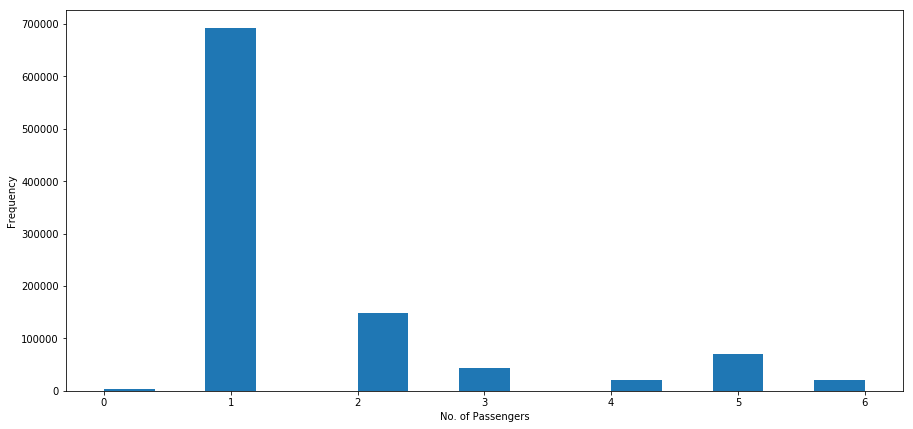

In [58]:
plt.figure(figsize=(15,7))
plt.hist(df['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')


Text(0, 0.5, 'Fare')

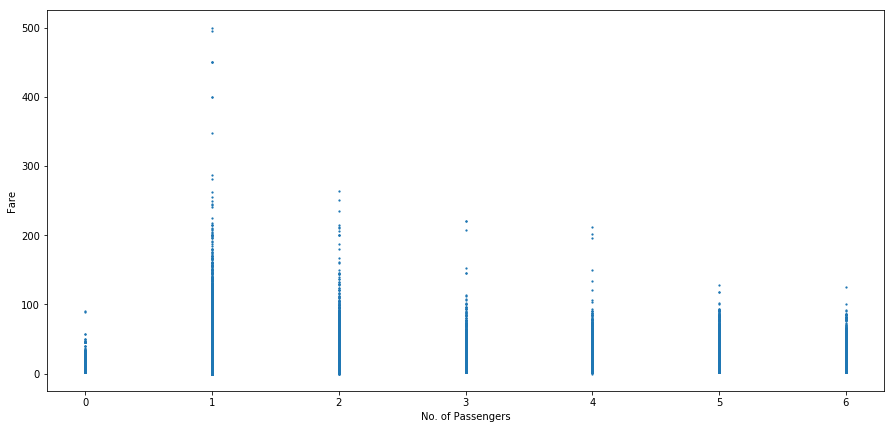

In [59]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['passenger_count'], y=df['fare_amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

Dos 2 gráficos acima, podemos ver que os passageiros solteiros são os viajantes mais frequentes, e a tarifa mais alta também parece vir de táxis que transportam apenas 1 passageiro.

## Explorando a variável Date (dia do mês do pickup)


Text(0, 0.5, 'Frequency')

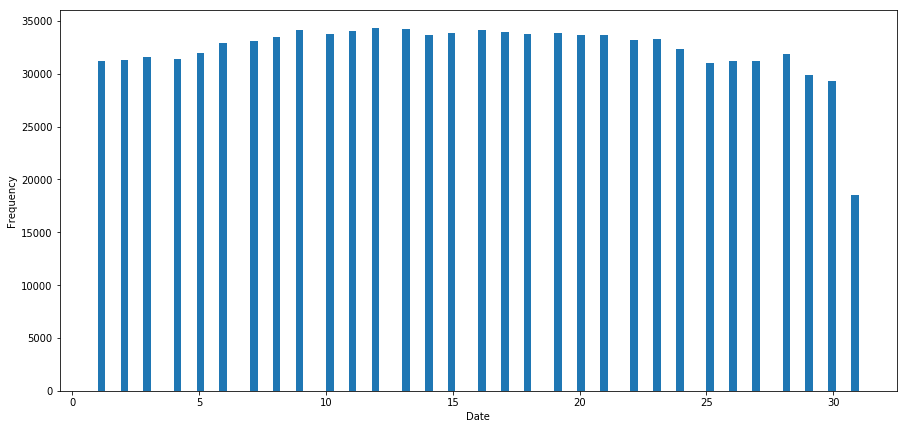

In [60]:
plt.figure(figsize=(15,7))
plt.hist(df['Date'], bins=100)
plt.xlabel('Date')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

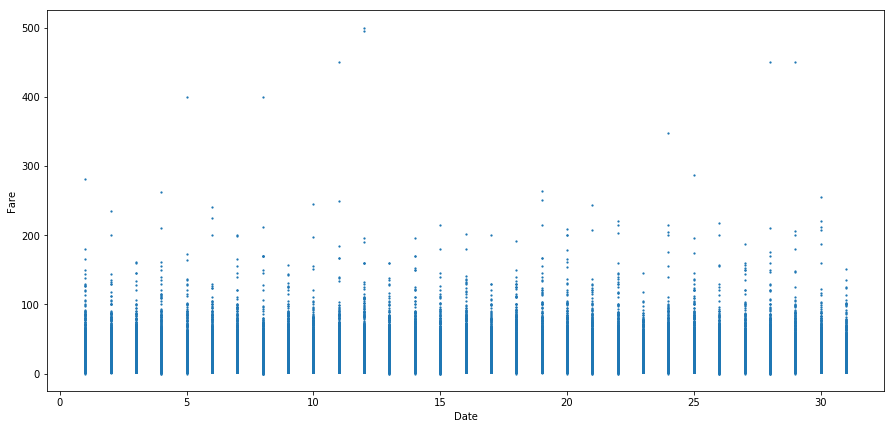

In [61]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['Date'], y=df['fare_amount'], s=1.5)
plt.xlabel('Date')
plt.ylabel('Fare')

## Explorando a variável Hour (hora do pickup)

Text(0, 0.5, 'Frequency')

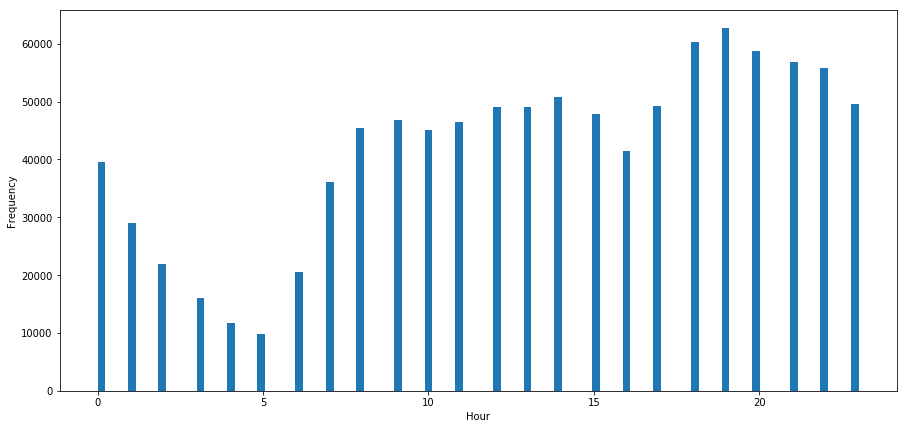

In [62]:
plt.figure(figsize=(15,7))
plt.hist(df['Hour'], bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

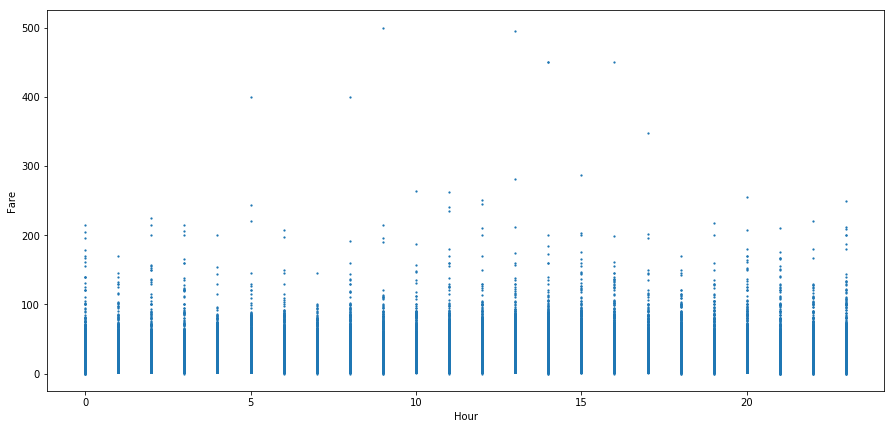

In [63]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['Hour'], y=df['fare_amount'], s=1.5)
plt.xlabel('Hour')
plt.ylabel('Fare')

Podemos entender a influência da frequência das corridas de taxi, sendo que os valores de mínimo estão às 5AM e os valores de máximo estão às 7PM.

## Explorando a variável Day of Week


Text(0, 0.5, 'Frequency')

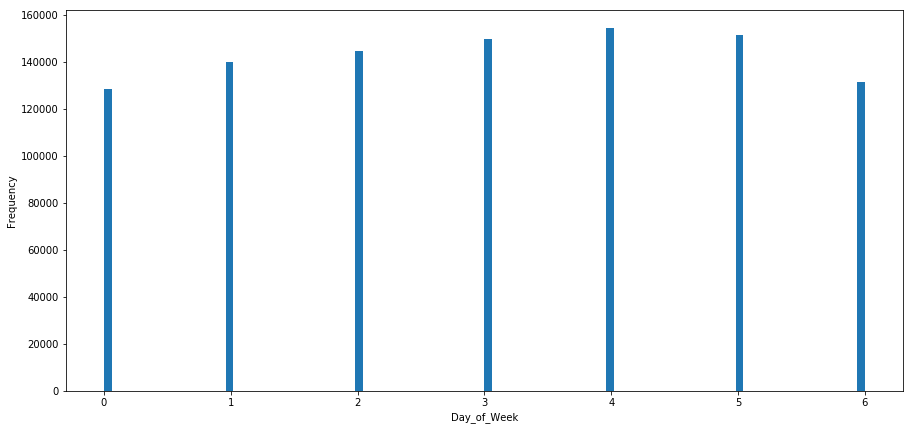

In [64]:
plt.figure(figsize=(15,7))
plt.hist(df['Day_of_Week'], bins=100)
plt.xlabel('Day_of_Week')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

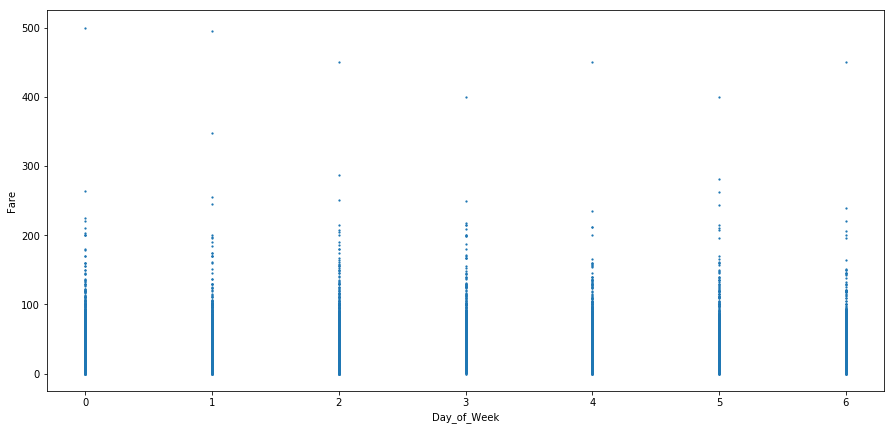

In [65]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['Day_of_Week'], y=df['fare_amount'], s=1.5)
plt.xlabel('Day_of_Week')
plt.ylabel('Fare')

A variável retorna o dia da semana de tal forma que assume-se que a semana começa na segunda-feira, que é denotada por 0 e termina no domingo, que é denotada por 6. Esse método está disponível em ambos os valores Series com data e hora (usando o acessador dt) ou DatetimeIndex.

As tarifas mais altas parecem estar no domingo e na segunda-feira, e as mais baixas na quarta e na sexta-feira. Talvez as pessoas viajem longas distâncias no domingo e segunda-feira (visitando a família e voltando para casa) e, portanto, as altas tarifas. Isto pode indicar que as pessoas acabam por ficar em casa em uma sexta-feira depois de uma semana de trabalho.

## Explorando a variável H_Distance 

Text(0, 0.5, 'Frequency')

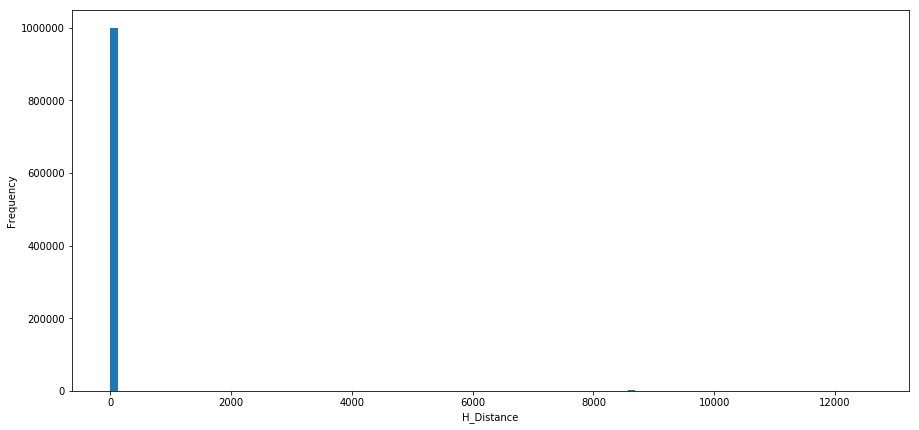

In [66]:
plt.figure(figsize=(15,7))
plt.hist(df['H_Distance'], bins=100)
plt.xlabel('H_Distance')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

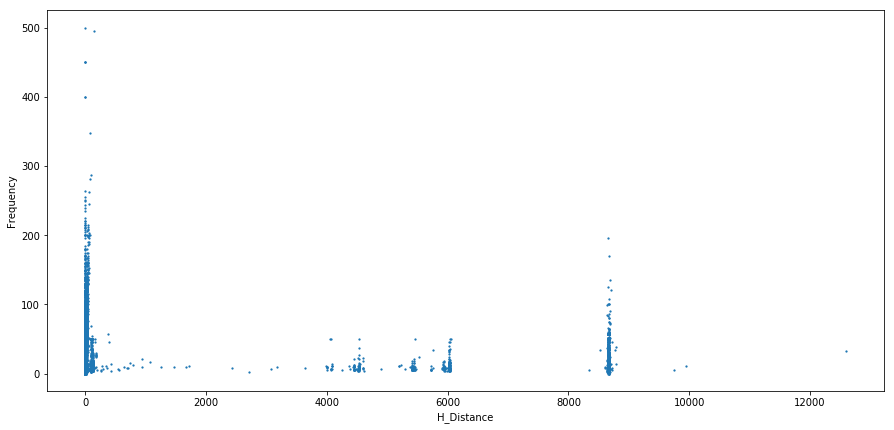

In [67]:
plt.figure(figsize=(15,7))
plt.scatter(df['H_Distance'], y=df['fare_amount'], s=1.5)
plt.xlabel('H_Distance')
plt.ylabel('Frequency')

Em primeiro lugar, vamos verificar a frequência das distâncias que calculamos usando a fórmula de Haversine com a criação de intervalos (0-10 kms, 10-20 kms e assim por diante) para a verificação da frequência dos dados e eventuais outlires.

In [68]:
bins_0 = df.loc[(df['H_Distance'] == 0), ['H_Distance']]
bins_1 = df.loc[(df['H_Distance'] > 0) & (df['H_Distance'] <= 10),['H_Distance']]
bins_2 = df.loc[(df['H_Distance'] > 10) & (df['H_Distance'] <= 50),['H_Distance']]
bins_3 = df.loc[(df['H_Distance'] > 50) & (df['H_Distance'] <= 100),['H_Distance']]
bins_4 = df.loc[(df['H_Distance'] > 100) & (df['H_Distance'] <= 200),['H_Distance']]
bins_5 = df.loc[(df['H_Distance'] > 200) & (df['H_Distance'] <= 300),['H_Distance']]
bins_6 = df.loc[(df['H_Distance'] > 300),['H_Distance']]

bins_0['bins'] = '0'
bins_1['bins'] = '0-10'
bins_2['bins'] = '11-50'
bins_3['bins'] = '51-100'
bins_4['bins'] = '100-200'
bins_5['bins'] = '201-300'
bins_6['bins'] = '>300'

dist_bins = pd.concat([bins_0,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6])
#len(dist_bins)
dist_bins.columns

Index(['H_Distance', 'bins'], dtype='object')

In [69]:
dist_bins.head()

,H_Distance,bins
11,0.0,0
15,0.0,0
26,0.0,0
105,0.0,0
124,0.0,0


In [70]:
dist_bins['bins'].value_counts()

0-10       920071
11-50       49073
0           28481
>300         1928
100-200       206
51-100        147
201-300         5
Name: bins, dtype: int64

Existem valores maiores que 100 kms,porém em Nova York precisamos explorar por que as pessoas pegam táxis para viajar mais de 100 quilômetros. Como a frequência do número de bins de 100 a 200 kms é bastante alto, a ideia será mantê-los. Esses outliers podem ser causados por erros de digitação ou valores ausentes na latitude ou longitude. Seguindo a análise exploratória e modelagem estatística, devemos pensar em remover campos dos seguintes:

- A latitude de pickup e a longitude de pickup são 0, mas a latitude e a longitude de dropoff não são 0, mas a tarifa é 0
- Vice-versa do ponto 1.
- A latitude de pickup e a longitude de pickup são 0, mas a latitude e longitude de dropoff não são 0, mas a tarifa é NÃO 0. Aqui teremos que imputar os valores de distância a serem calculados de acordo com fórmula de cobrança dos taxímetros.

## A latitude de pickup e a longitude de pickup são 0, mas a latitude e a longitude de dropoff não são 0, mas a tarifa é 0

In [71]:
#pickup latitude and longitude = 0
df.loc[((df['pickup_latitude']==0) & (df['pickup_longitude']==0))&((df['dropoff_latitude']!=0) & (df['dropoff_longitude']!=0)) & (df['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day_of_Week,Hour
897211,2015-04-08 00:47:30.000000100,0.0,2015-04-08 00:47:30+00:00,0.0,0.0,-73.937698,40.758118,1,8662.340373,2015,4,8,2,0


In [72]:
df = df.drop(df.loc[((df['pickup_latitude']==0) & (df['pickup_longitude']==0))&\
                    ((df['dropoff_latitude']!=0) & (df['dropoff_longitude']!=0)) & (df['fare_amount']==0)].index, axis=0)

# 1 row dropped
df.shape

(999910, 14)

In [73]:
#dropoff latitude and longitude = 0
df.loc[((df['pickup_latitude']!=0) & (df['pickup_longitude']!=0))&((df['dropoff_latitude']==0) & (df['dropoff_longitude']==0)) & (df['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day_of_Week,Hour
930680,2015-03-21 21:27:02.000000200,0.0,2015-03-21 21:27:02+00:00,-73.982101,40.770557,0.0,0.0,2,8666.270974,2015,3,21,5,21
942215,2015-03-22 00:36:37.000000900,0.0,2015-03-22 00:36:37+00:00,-73.952240,40.749435,0.0,0.0,1,8663.365938,2015,3,22,6,0
949564,2015-04-28 11:18:39.000000400,0.0,2015-04-28 11:18:39+00:00,-73.996246,40.748653,0.0,0.0,1,8666.993460,2015,4,28,1,11


In [74]:
df = df.drop(df.loc[((df['pickup_latitude']!=0) & (df['pickup_longitude']!=0))&\
                    ((df['dropoff_latitude']==0) & (df['dropoff_longitude']==0)) & (df['fare_amount']==0)].index, axis=0)

# 3 rows dropped
df.shape

(999907, 14)

## Valores de distância maiores do que 200Km

Verificando os campos H_Distance que são maiores que 200 kms, pois dificilmente as pessoas podem viajar mais de 200 kms no máximo em NYC em um taxi.

In [75]:
high_distance = df.loc[(df['H_Distance']>200)&(df['fare_amount']!=0)]

In [76]:
high_distance.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day_of_Week,Hour
472,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00+00:00,0.000000,0.000000,-74.005433,40.726685,2,8667.304968,2009,2,22,6,22
1260,2011-03-10 20:25:00.000000490,5.7,2011-03-10 20:25:00+00:00,-73.973907,40.754743,0.000000,0.000000,2,8665.268588,2011,3,10,3,20
2280,2011-08-29 08:24:00.000000107,8.9,2011-08-29 08:24:00+00:00,-73.936667,40.757815,0.000000,40.757815,1,6026.494216,2011,8,29,0,8
2397,2012-06-24 17:11:10.000000100,45.0,2012-06-24 17:11:10+00:00,0.000000,0.000000,-74.010230,40.714553,2,8667.454421,2012,6,24,6,17
4278,2015-04-07 23:33:02.000000500,7.0,2015-04-07 23:33:02+00:00,-73.972702,40.757423,0.000000,0.000000,1,8665.223767,2015,4,7,1,23


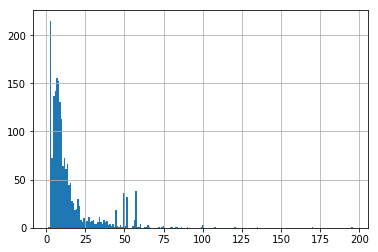

In [77]:
high_distance.fare_amount.hist(bins=200)

In [78]:
high_distance.shape

(1929, 14)

Como podemos ver no DF acima, as distâncias anormalmente altas se devem ao fato de as coordenadas de pickup ou dropoff estarem incorretas ou 0. No entanto, como todos esses valores têm tarifas, descartá-las não é a melhor estratégia, pois elas contêm dados cruciais. Em vez disso, vamos substituir os valores iniciais de distância por valores de distância calculados usando a tarifa usando a fórmula de cobrança de carridas de taxi abaixo.

#### distance = (fare_amount - 2.5)/1.56

In [79]:
high_distance['H_Distance'] = high_distance.apply(lambda row: (row['fare_amount'] - 2.50)/1.56, axis=1)


C:\Users\suzic\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [80]:
# Verificando a substituição dos dadso de distância calculados de acordo com a fórmula 
high_distance.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day_of_Week,Hour
472,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00+00:00,0.000000,0.000000,-74.005433,40.726685,2,0.000000,2009,2,22,6,22
1260,2011-03-10 20:25:00.000000490,5.7,2011-03-10 20:25:00+00:00,-73.973907,40.754743,0.000000,0.000000,2,2.051282,2011,3,10,3,20
2280,2011-08-29 08:24:00.000000107,8.9,2011-08-29 08:24:00+00:00,-73.936667,40.757815,0.000000,40.757815,1,4.102564,2011,8,29,0,8
2397,2012-06-24 17:11:10.000000100,45.0,2012-06-24 17:11:10+00:00,0.000000,0.000000,-74.010230,40.714553,2,27.243590,2012,6,24,6,17
4278,2015-04-07 23:33:02.000000500,7.0,2015-04-07 23:33:02+00:00,-73.972702,40.757423,0.000000,0.000000,1,2.884615,2015,4,7,1,23


In [81]:
# Sincronizando os dados com os valores calculados no DataFrame original 
df.update(high_distance)

In [82]:
df.shape

(999907, 14)

## Verificando os valores com H_Distance iguais a zero

Agora vamos verificar as linhas onde os valores de distância são 0

In [83]:
df[df['H_Distance']==0].head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day_of_Week,Hour
11,2012-12-24 11:24:00.000000980,5.5,2012-12-24 11:24:00,0.000000,0.00000,0.000000,0.00000,3.0,0.0,2012.0,12.0,24.0,0.0,11.0
15,2013-11-23 12:57:00.000000190,5.0,2013-11-23 12:57:00,0.000000,0.00000,0.000000,0.00000,1.0,0.0,2013.0,11.0,23.0,5.0,12.0
26,2011-02-07 20:01:00.000000114,6.5,2011-02-07 20:01:00,0.000000,0.00000,0.000000,0.00000,1.0,0.0,2011.0,2.0,7.0,0.0,20.0
105,2009-03-25 00:08:52.000000100,52.0,2009-03-25 00:08:52,-74.035839,40.74732,-74.035839,40.74732,1.0,0.0,2009.0,3.0,25.0,2.0,0.0
124,2013-01-17 17:22:00.000000430,8.0,2013-01-17 17:22:00,0.000000,0.00000,0.000000,0.00000,2.0,0.0,2013.0,1.0,17.0,3.0,17.0


In [84]:
df[df['H_Distance']==0].shape

(28667, 14)

Podemos ver algumas linhas com distância = 0. Isso pode ser devido a 2 motivos

- O táxi esperou o tempo todo e o passageiro acabou cancelado. É por isso que as coordenadas de coleta e queda são as mesmas e talvez o passageiro tenha sido cobrado pelo tempo de espera.

- As coordenadas de coleta de dropoff não foram inseridas. Em outras palavras, esses valores estão faltando.

28667 linhas são muitas linhas para serem excluídas. Precisamos imputar esses valores ausentes. Podemos adotar a estratégia de imputar os valores de distância perdidos com a tarifa e o preço médio por quilômetro dos táxis de Nova York.

Verificando as fórmulas de calculo de tarifa temos:

#### Preço base de USD 2,5 + USD 1,56 / km -> das 06:00 h às 20:00 h de segunda a sexta

#### Preço base de USD 3.0 + USD 1,56 / km -> das 20:00 h às 06:00 h de segunda a sexta e sáb e dom

No entanto, antes de prosseguirmos com as etapas acima, vamos verificar os cenários a seguir para imputar o valor da tarifa ausente e a H_Distance nos dados

1. Tarifa e Distância são ambas 0. 
2. A tarifa não é 0 e é menor que o valor base, mas a distância é 0.
3. A tarifa é 0, mas a distância não é 0.
4. A tarifa não é 0, mas a distância é 0.

## 1. Tarifa e Distância são ambas 0. 

De acordo com a tabela acima, nós as excluiremos, pois elas não nos fornecem nenhuma informação com relação aos dados.

In [85]:
df[(df['H_Distance']==0)&(df['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day_of_Week,Hour
105051,2013-08-21 21:41:00.000000215,0.0,2013-08-21 21:41:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,8.0,21.0,2.0,21.0
331597,2013-08-05 06:45:54.000000500,0.0,2013-08-05 06:45:54,-73.982354,40.679971,-73.982354,40.679971,1.0,0.0,2013.0,8.0,5.0,0.0,6.0
436658,2015-03-04 22:33:39.000000800,0.0,2015-03-04 22:33:39,-74.043442,40.788208,-74.043442,40.788208,1.0,0.0,2015.0,3.0,4.0,2.0,22.0
689250,2015-05-27 23:10:03.000000400,0.0,2015-05-27 23:10:03,-73.994125,40.741131,-73.994125,40.741131,1.0,0.0,2015.0,5.0,27.0,2.0,23.0


In [86]:
df = df.drop(df[(df['H_Distance']==0)&(df['fare_amount']==0)].index, axis = 0)

In [87]:
# 4 linhas excluidas
df[(df['H_Distance']==0)].shape

(28663, 14)

## 2. A tarifa não é 0 e é menor que o valor base, mas a distância é 0.

A ideia inicial é excluir essas linhas, pois o mínimo é de US $ 2,50 e essas tarifas são valores incorretos.

#### Entre 6AM e 8PM em dias de semana Mon-Fri

In [88]:
rush_hour = df.loc[(((df['Hour']>=6)&(df['Hour']<=20)) & ((df['Day_of_Week']>=1) & (df['Day_of_Week']<=5)) & (df['H_Distance']==0) & (df['fare_amount'] < 2.5))]
rush_hour

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day_of_Week,Hour
830616,2015-01-21 06:29:21.000000600,0.01,2015-01-21 06:29:21,0.0,0.0,0.0,0.0,1.0,0.0,2015.0,1.0,21.0,2.0,6.0
925892,2015-01-21 14:12:00.000000400,1.90,2015-01-21 14:12:00,0.0,0.0,0.0,0.0,1.0,0.0,2015.0,1.0,21.0,2.0,14.0


In [89]:
# Vamos excluir estas duas linhas pois estão abaixo do limite inicial
df=df.drop(rush_hour.index, axis=0)

In [90]:
df.shape

(999901, 14)

#### Entre 8PM e 6AM em dias de semana Mon-Fri

In [91]:
non_rush_hour = df.loc[(((df['Hour']<6)|(df['Hour']>20)) & ((df['Day_of_Week']>=1)&(df['Day_of_Week']<=5)) & (df['H_Distance']==0) & (df['fare_amount'] < 3.0))]
#print(Counter(non_work_hours['Hour']))
#print(Counter(non_work_hours['Day of Week']))
non_rush_hour.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day_of_Week,Hour
376,2014-05-29 05:57:22.000000100,2.5,2014-05-29 05:57:22,0.00000,0.000000,0.00000,0.000000,1.0,0.0,2014.0,5.0,29.0,3.0,5.0
503,2010-01-19 01:10:00.000000120,2.5,2010-01-19 01:10:00,-73.99872,40.624708,-73.99872,40.624708,1.0,0.0,2010.0,1.0,19.0,1.0,1.0
657,2009-08-25 01:50:21.000000100,2.5,2009-08-25 01:50:21,-73.98641,40.763350,-73.98641,40.763350,1.0,0.0,2009.0,8.0,25.0,1.0,1.0
3168,2012-07-06 22:07:00.000000111,2.5,2012-07-06 22:07:00,0.00000,0.000000,0.00000,0.000000,1.0,0.0,2012.0,7.0,6.0,4.0,22.0
12953,2010-07-23 03:30:08.000000100,2.9,2010-07-23 03:30:08,0.00000,0.000000,0.00000,0.000000,1.0,0.0,2010.0,7.0,23.0,4.0,3.0


In [92]:
non_rush_hour.fare_amount.value_counts()


2.5    210
2.9     33
Name: fare_amount, dtype: int64

Vamos manter esses valores uma vez que, como o fare_amount não é <2,5 (que é a tarifa básica), esses valores parecem legítimos.

#### Saturday and Sunday all hours

In [93]:
weekends = df.loc[((df['Day_of_Week']==0) | (df['Day_of_Week']==6)) & (df['H_Distance']==0) & (df['fare_amount'] < 3.0)]
weekends.head()
#Counter(weekends['Day of Week'])

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day_of_Week,Hour
472,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2.0,0.0,2009.0,2.0,22.0,6.0,22.0
1419,2013-07-21 00:10:23.000000100,2.5,2013-07-21 00:10:23,-73.956556,40.779828,-73.956556,40.779828,1.0,0.0,2013.0,7.0,21.0,6.0,0.0
1774,2012-08-27 15:24:00.000000700,2.5,2012-08-27 15:24:00,-73.950282,40.701282,-73.950282,40.701282,1.0,0.0,2012.0,8.0,27.0,0.0,15.0
4367,2014-01-13 16:14:48.000000100,2.5,2014-01-13 16:14:48,-73.948410,40.744969,-73.948410,40.744969,1.0,0.0,2014.0,1.0,13.0,0.0,16.0
4954,2010-01-10 13:44:35.000000700,2.5,2010-01-10 13:44:35,-73.983934,40.754938,-73.983934,40.754938,1.0,0.0,2010.0,1.0,10.0,6.0,13.0


In [94]:
weekends.fare_amount.value_counts()

2.5    337
2.9     35
Name: fare_amount, dtype: int64

Vamos manter esses valores também pois novamente o fare_amount não é <2,5 (que é a tarifa básica), de novo esses valores parecem legítimos.

## 3. A tarifa é 0, mas a distância não é 0.

Esses valores precisam ser imputados.

devemos calcular a tarifa correspondente baseado da distância. Devemos utilizar a seguinte fórmula (para simplificar em relação a horas de não pressa e fins de semana)

#### tarifa = 2.5 + 1.56 (H_Distance)

In [95]:
scenario_3 = df.loc[(df['H_Distance']!=0) & (df['fare_amount']==0)]
scenario_3.shape

(21, 14)

In [96]:
scenario_3.fare_amount.value_counts()

0.0    21
Name: fare_amount, dtype: int64

In [97]:
scenario_3['fare_amount'] = scenario_3.apply(lambda row: ((row['H_Distance'] * 1.56) + 2.50), axis=1)

C:\Users\suzic\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [98]:
scenario_3['fare_amount']

10002      7.468230
27891      2.501660
47302      2.528736
175352     2.514421
211455     2.509022
211499     2.500838
266485     2.505469
386734     3.321137
431819     7.179423
489767     2.501201
495273     2.500662
520715     3.157114
561786    19.524533
670254     2.500662
681342     2.501577
760662     3.034632
762802    25.597788
788466    28.034391
895361     3.369958
938020     2.501202
957590     2.505506
Name: fare_amount, dtype: float64

In [99]:
df.update(scenario_3)

In [100]:
df.shape

(999901, 14)

## 4. A tarifa não é 0, mas a distância é 0.

Esses valores precisam ser imputados.

In [101]:
scenario_4 = df.loc[(df['H_Distance']==0) & (df['fare_amount']!=0)]
scenario_4.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day_of_Week,Hour
11,2012-12-24 11:24:00.000000980,5.5,2012-12-24 11:24:00,0.000000,0.00000,0.000000,0.00000,3.0,0.0,2012.0,12.0,24.0,0.0,11.0
15,2013-11-23 12:57:00.000000190,5.0,2013-11-23 12:57:00,0.000000,0.00000,0.000000,0.00000,1.0,0.0,2013.0,11.0,23.0,5.0,12.0
26,2011-02-07 20:01:00.000000114,6.5,2011-02-07 20:01:00,0.000000,0.00000,0.000000,0.00000,1.0,0.0,2011.0,2.0,7.0,0.0,20.0
105,2009-03-25 00:08:52.000000100,52.0,2009-03-25 00:08:52,-74.035839,40.74732,-74.035839,40.74732,1.0,0.0,2009.0,3.0,25.0,2.0,0.0
124,2013-01-17 17:22:00.000000430,8.0,2013-01-17 17:22:00,0.000000,0.00000,0.000000,0.00000,2.0,0.0,2013.0,1.0,17.0,3.0,17.0


In [102]:
scenario_4.shape

(28661, 14)

Levando em consideração a fórmula básica:

- Preço base de USD 2,5 + USD 1,56 / km -> das 06: 00h às 20: 00h, de segunda a sexta-feira;

- Preço base de USD 3,0 + USD 1,56 / km -> 20:00 h às 06:00 h de segunda a sexta e sáb e dom

Devemos adotar cálculos de distância como:

- distância = (tarifa - 2,5) / 1,56 -> 6:00 às 20:00 seg - sex (hora do rush)

- distância = (tarifa - 3.0) / 1.56 -> das 8h às 6h seg-sex e sáb e dom (hora do rush)

### Rush Hour

In [103]:
rush_hour_4 = scenario_4.loc[(((scenario_4['Hour']>=6)&(scenario_4['Hour']<=20)) & ((scenario_4['Day_of_Week']>=1) & (scenario_4['Day_of_Week']<=5)))]
rush_hour_4.shape

(14768, 14)

In [104]:
rush_hour_4.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day_of_Week,Hour
15,2013-11-23 12:57:00.000000190,5.0,2013-11-23 12:57:00,0.0,0.0,0.0,0.0,1.0,0.0,2013.0,11.0,23.0,5.0,12.0
124,2013-01-17 17:22:00.000000430,8.0,2013-01-17 17:22:00,0.0,0.0,0.0,0.0,2.0,0.0,2013.0,1.0,17.0,3.0,17.0
273,2009-10-30 18:13:00.000000210,8.1,2009-10-30 18:13:00,0.0,0.0,0.0,0.0,4.0,0.0,2009.0,10.0,30.0,4.0,18.0
357,2013-07-04 16:41:27.000000200,8.5,2013-07-04 16:41:27,0.0,0.0,0.0,0.0,1.0,0.0,2013.0,7.0,4.0,3.0,16.0
387,2012-11-15 08:39:00.000000950,13.0,2012-11-15 08:39:00,0.0,0.0,0.0,0.0,1.0,0.0,2012.0,11.0,15.0,3.0,8.0


In [105]:
rush_hour_4['H_Distance'] = rush_hour_4.apply(lambda row: (row['fare_amount'] - 2.5) / 1.56, axis=1)
rush_hour_4.head()

C:\Users\suzic\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day_of_Week,Hour
15,2013-11-23 12:57:00.000000190,5.0,2013-11-23 12:57:00,0.0,0.0,0.0,0.0,1.0,1.602564,2013.0,11.0,23.0,5.0,12.0
124,2013-01-17 17:22:00.000000430,8.0,2013-01-17 17:22:00,0.0,0.0,0.0,0.0,2.0,3.525641,2013.0,1.0,17.0,3.0,17.0
273,2009-10-30 18:13:00.000000210,8.1,2009-10-30 18:13:00,0.0,0.0,0.0,0.0,4.0,3.589744,2009.0,10.0,30.0,4.0,18.0
357,2013-07-04 16:41:27.000000200,8.5,2013-07-04 16:41:27,0.0,0.0,0.0,0.0,1.0,3.846154,2013.0,7.0,4.0,3.0,16.0
387,2012-11-15 08:39:00.000000950,13.0,2012-11-15 08:39:00,0.0,0.0,0.0,0.0,1.0,6.730769,2012.0,11.0,15.0,3.0,8.0


In [106]:
df.update(rush_hour_4)

### Non Rush Hour

In [107]:
scenario_4.shape[0] - rush_hour_4.shape[0]

13893

In [108]:
non_rush_hour_4 = scenario_4.drop(rush_hour_4.index, axis=0)
non_rush_hour_4.shape

(13893, 14)

In [109]:
non_rush_hour_4['H_Distance'] = non_rush_hour_4.apply(lambda row: (row['fare_amount'] - 3.0) / 1.56, axis=1)
non_rush_hour_4.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day_of_Week,Hour
11,2012-12-24 11:24:00.000000980,5.5,2012-12-24 11:24:00,0.000000,0.000000,0.000000,0.000000,3.0,1.602564,2012.0,12.0,24.0,0.0,11.0
26,2011-02-07 20:01:00.000000114,6.5,2011-02-07 20:01:00,0.000000,0.000000,0.000000,0.000000,1.0,2.243590,2011.0,2.0,7.0,0.0,20.0
105,2009-03-25 00:08:52.000000100,52.0,2009-03-25 00:08:52,-74.035839,40.747320,-74.035839,40.747320,1.0,31.410256,2009.0,3.0,25.0,2.0,0.0
191,2014-01-08 21:55:58.000000600,6.5,2014-01-08 21:55:58,-73.998488,40.726303,-73.998488,40.726303,1.0,2.243590,2014.0,1.0,8.0,2.0,21.0
192,2010-09-05 17:08:00.000000920,3.7,2010-09-05 17:08:00,0.000000,0.000000,0.000000,0.000000,5.0,0.448718,2010.0,9.0,5.0,6.0,17.0


In [110]:
df.update(non_rush_hour_4)

# MODELAGEM ESTATÍSTICA

Agora vamos criar uma cópia do DataFrame original e entender como podemos explicar os valores de taxa de corrida de taxi com os dados criados.

In [111]:
df_copy = df.copy()

In [112]:
df_copy.shape

(999901, 14)

In [113]:
df_copy.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'H_Distance', 'Year', 'Month', 'Date', 'Day_of_Week',
       'Hour'],
      dtype='object')

In [114]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999901 entries, 0 to 999999
Data columns (total 14 columns):
key                  999901 non-null datetime64[ns]
fare_amount          999901 non-null float64
pickup_datetime      999901 non-null datetime64[ns]
pickup_longitude     999901 non-null float64
pickup_latitude      999901 non-null float64
dropoff_longitude    999901 non-null float64
dropoff_latitude     999901 non-null float64
passenger_count      999901 non-null float64
H_Distance           999901 non-null float64
Year                 999901 non-null float64
Month                999901 non-null float64
Date                 999901 non-null float64
Day_of_Week          999901 non-null float64
Hour                 999901 non-null float64
dtypes: datetime64[ns](2), float64(12)
memory usage: 114.4 MB


In [115]:
df_copy.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day_of_Week,Hour
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,1.030764,2009.0,6.0,15.0,0.0,17.0
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,8.450134,2010.0,1.0,5.0,1.0,16.0
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,1.389525,2011.0,8.0,18.0,3.0,0.0
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2.799270,2012.0,4.0,21.0,5.0,4.0
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,1.999157,2010.0,3.0,9.0,1.0,7.0


## Normalizando os dados

Vamos aplicar o StandardScaler() para termos todos os dados com a mesma ordem de grandeza

In [116]:
df_copy.drop(columns=['key','pickup_datetime', 'pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'],axis=1,inplace=True)

In [117]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_copy)

In [118]:
df_scaled = pd.DataFrame(scaled_data,columns=['fare_amount', 'passenger_count', 'H_Distance', 'Year', 'Month', 'Date','Day_of_Week', 'Hour'])
df_scaled.head()

,fare_amount,passenger_count,H_Distance,Year,Month,Date,Day_of_Week,Hour
0,-0.697355,-0.523610,-0.556519,-1.473079,-0.078002,-0.080383,-1.558923,0.535848
1,0.565224,-0.523610,1.143548,-0.935657,-1.533078,-1.232130,-1.046094,0.382327
2,-0.575170,0.241076,-0.474313,-0.398235,0.504029,0.265142,-0.020437,-2.074005
3,-0.371528,-0.523610,-0.151285,0.139187,-0.660032,0.610666,1.005221,-1.459922
4,-0.615898,-0.523610,-0.334623,-0.935657,-0.951048,-0.771431,-1.046094,-0.999360


In [119]:
formula = 'fare_amount ~ passenger_count + H_Distance + Year + Month + Date + Day_of_Week + Hour'

result = sm.ols(formula, data=df_scaled).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                 2.256e+05
Date:                Mon, 27 May 2019   Prob (F-statistic):               0.00
Time:                        15:02:49   Log-Likelihood:            -9.4509e+05
No. Observations:              999901   AIC:                         1.890e+06
Df Residuals:                  999893   BIC:                         1.890e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3.614e-15      0.001    5

## Visualização dos dados e estratégias de transformação 

In [120]:
df_copy.columns

Index(['fare_amount', 'passenger_count', 'H_Distance', 'Year', 'Month', 'Date',
       'Day_of_Week', 'Hour'],
      dtype='object')

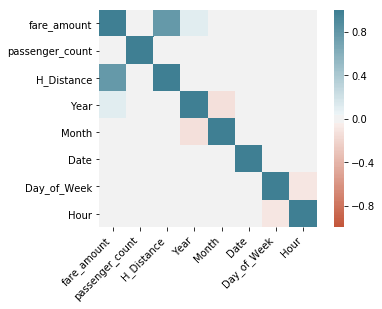

In [121]:
corr = df_copy.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

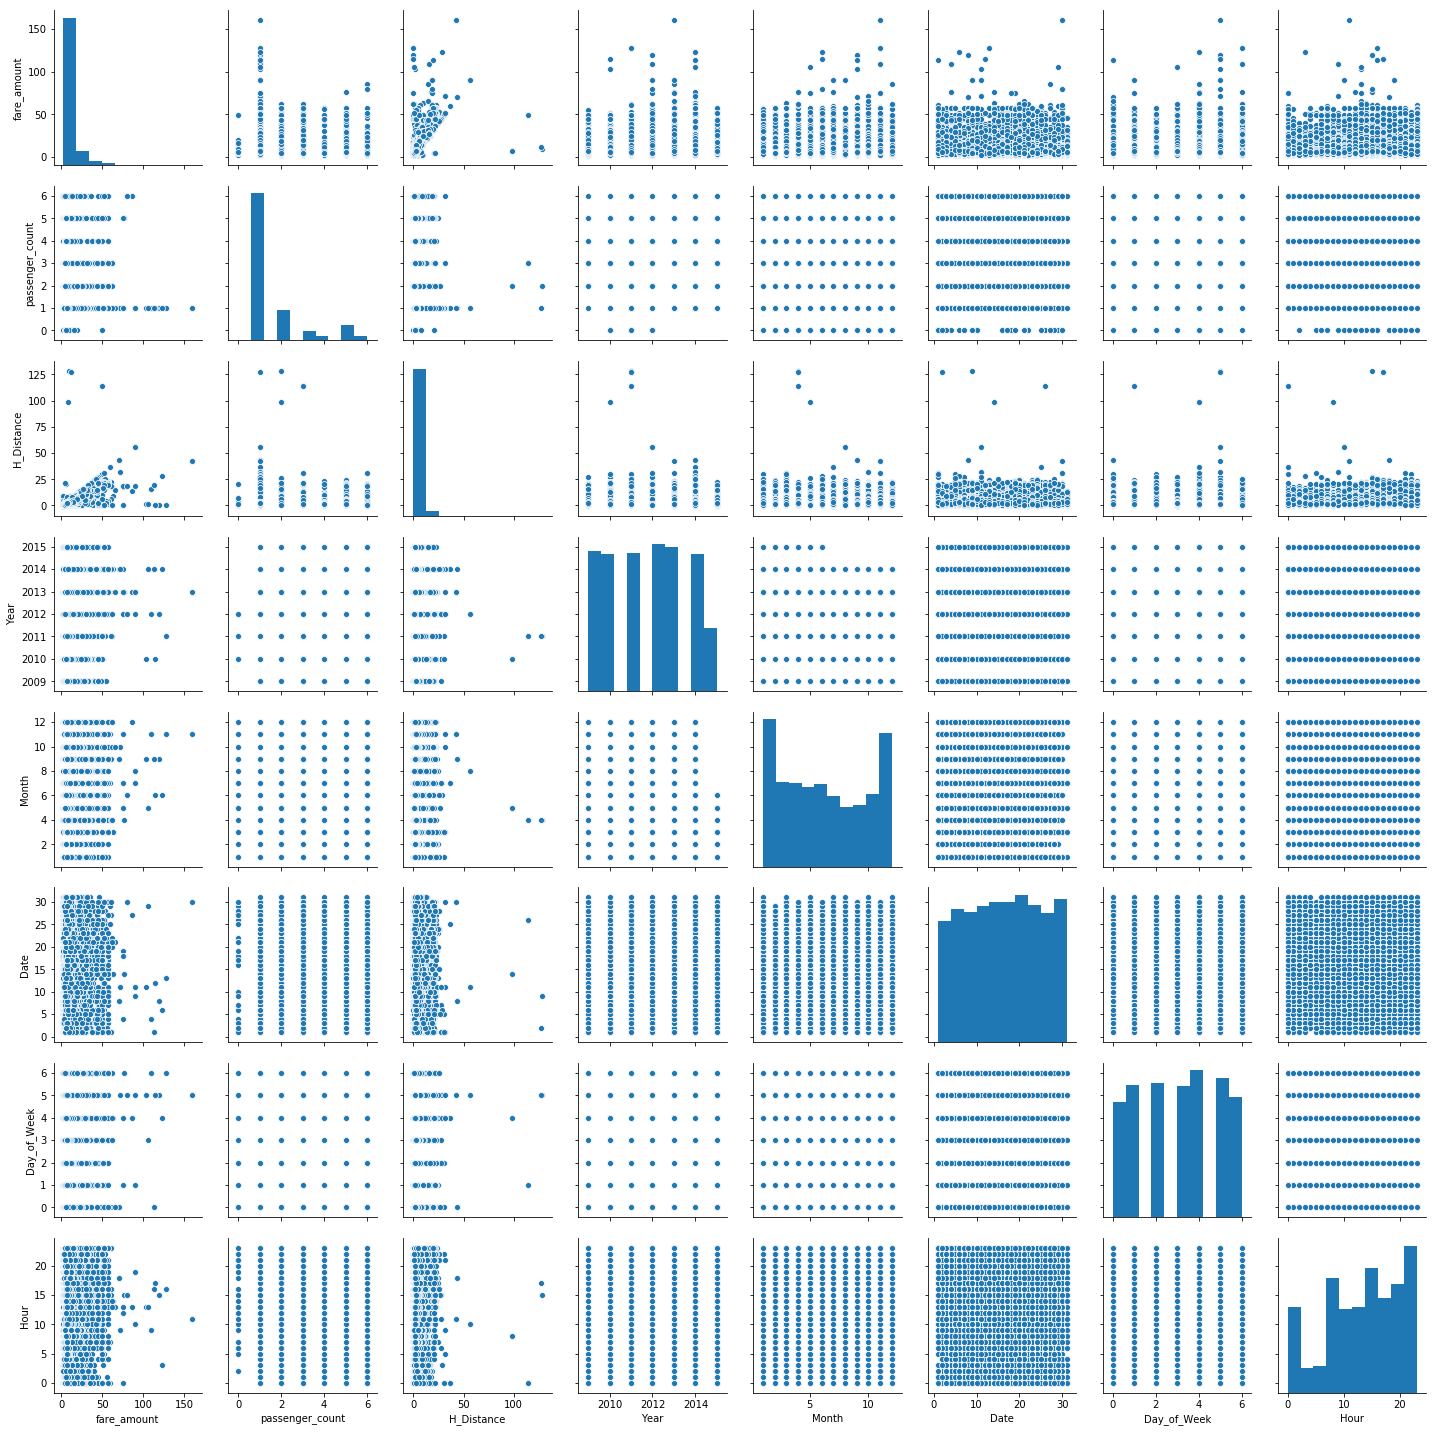

In [122]:
sns.pairplot(df_copy.sample(n=10000))

Podemos visualizar que existe uma relação linear significativa entre a taxa da corrida e a distância percorrida (talvez impulsionada pela inserção de valores de acrodo com a fóormula de cálculo do preço). Além disso, também podemos observar que ambas as variávais tem assimeria positiva presente nos gráficos de distribuição. Portanto a melhor estratégia é transformar ambas as variáveis com o LOG.

In [123]:
formula = 'np.log1p(fare_amount) ~ passenger_count + np.log1p(H_Distance) + Year + Month + Date + Day_of_Week + Hour'

result = sm.ols(formula, data=df_copy).fit()
print(result.summary())

                              OLS Regression Results                             
Dep. Variable:     np.log1p(fare_amount)   R-squared:                       0.773
Model:                               OLS   Adj. R-squared:                  0.773
Method:                    Least Squares   F-statistic:                 4.874e+05
Date:                   Mon, 27 May 2019   Prob (F-statistic):               0.00
Time:                           15:04:13   Log-Likelihood:                -74866.
No. Observations:                 999901   AIC:                         1.497e+05
Df Residuals:                     999893   BIC:                         1.498e+05
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
In

# AVANÇADO

Vamos aplicar as análises e modelagens para os dados de teste e verificar a qualidade de predição do modelo

In [124]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split
from keras import layers
from keras import models

from keras import regularizers
from keras.metrics import mean_squared_logarithmic_error


ModuleNotFoundError: No module named 'keras'

In [128]:
test = pd.read_csv("../../02 Analise Exploratoria Inter/05 Modelagem Estatistica 2/test.csv", nrows = 1000000)
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


## Verificação dos dados

In [129]:
test.isnull().sum().sort_values(ascending=False)

passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
key                  0
dtype: int64

In [130]:
test.passenger_count.value_counts()

1    6914
2    1474
5     696
3     447
4     206
6     177
Name: passenger_count, dtype: int64

In [131]:
test.pickup_latitude.describe()

count    9914.000000
mean       40.751041
std         0.033541
min        40.573143
25%        40.736125
50%        40.753051
75%        40.767113
max        41.709555
Name: pickup_latitude, dtype: float64

In [132]:
test.dropoff_latitude.describe()

count    9914.000000
mean       40.751743
std         0.035435
min        40.568973
25%        40.735254
50%        40.754065
75%        40.768757
max        41.696683
Name: dropoff_latitude, dtype: float64

In [133]:
test.pickup_longitude.describe()

count    9914.000000
mean      -73.974722
std         0.042774
min       -74.252193
25%       -73.992501
50%       -73.982326
75%       -73.968013
max       -72.986532
Name: pickup_longitude, dtype: float64

In [134]:
test.dropoff_longitude.describe()

count    9914.000000
mean      -73.973657
std         0.039072
min       -74.263242
25%       -73.991247
50%       -73.980015
75%       -73.964059
max       -72.990963
Name: dropoff_longitude, dtype: float64

## Cálculo das distâncias

In [135]:
def haversine_test(lat1, long1, lat2, long2):
    data = [test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φ2 - φ1)/2) + cos φ1 . cos φ2 . sin²((λ2 - λ1)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

haversine_test('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude').head(10)
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,2.323260
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,2.425353
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,0.618628
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,1.961033
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,5.387301


In [136]:
test.H_Distance.describe()

count    9914.000000
mean        3.435371
std         3.972374
min         0.000000
25%         1.298277
50%         2.217412
75%         4.045302
max        99.996040
Name: H_Distance, dtype: float64

In [137]:
test.H_Distance.value_counts().nlargest(4)

0.000000    85
0.373429     1
8.889989     1
1.464714     1
Name: H_Distance, dtype: int64

## Transformação das variáveis Date and Time

In [138]:
test['key'] = pd.to_datetime(test['key'])
test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])

In [139]:
data = [test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day_of_Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [140]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day_of_Week,Hour
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2.323260,2015,1,27,1,13
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,2015,1,27,1,13
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,2011,10,8,5,11
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,1.961033,2012,12,1,5,21
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,5.387301,2012,12,1,5,21


## Excluíndo as colunas que não interessam

In [141]:
test.drop(columns=['key','pickup_datetime', 'pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'],axis=1,inplace=True)

## Fazendo as predições

In [142]:


df_copy['fare_amount'] = np.log1p(df_copy['fare_amount'])
df_copy['H_Distance'] = np.log1p(df_copy['H_Distance'])

test['H_Distance'] = np.log1p(test['H_Distance'])



In [143]:
x_train = df_copy.drop(['fare_amount'],axis=1)
y_train = df_copy.fare_amount

x_test = test

# Linear Regression

In [145]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(x_train,y_train)
y_pred_lr = model_lr.predict(x_test)
y_pred_lr = np.exp(y_pred_lr)
y_pred_lr

array([10.80000192, 11.05697016,  5.47911785, ..., 44.84624616,
       24.09800589,  7.80155069])

In [151]:
submission = pd.read_csv('../../02 Analise Exploratoria Inter/05 Modelagem Estatistica 2/sample_submission.csv')
submission['fare_amount'] = y_pred_lr
submission.to_csv('submission_lr.csv', index=False)
submission.head(20)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.800002
1,2015-01-27 13:08:24.0000003,11.056970
2,2011-10-08 11:53:44.0000002,5.479118
3,2012-12-01 21:12:12.0000002,9.241026
4,2012-12-01 21:12:12.0000003,16.795145
5,2012-12-01 21:12:12.0000005,12.175880
6,2011-10-06 12:10:20.0000001,6.329315
7,2011-10-06 12:10:20.0000003,42.749744
8,2011-10-06 12:10:20.0000002,13.004240
9,2014-02-18 15:22:20.0000002,7.322508


In [154]:
!pip install ml_metrics

  Stored in directory: C:\Users\suzic\AppData\Local\pip\Cache\wheels\b3\61\2d\776be7b8a4f14c5db48c8e5451451cabc58dc6aa7ee3801163
Successfully built ml-metrics


In [155]:
from ml_metrics import rmse

y_pred_lr_train = model_lr.predict(x_train)

rmse(y_train, y_pred_lr_train)

0.2607833632938467

# LGBM

In [156]:
!pip install lightgbm

In [157]:
import lightgbm as lgbm

params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'nthread': -1,
        'verbose': 0,
        'num_leaves': 31,
        'learning_rate': 0.05,
        'max_depth': -1,
        'subsample': 0.8,
        'subsample_freq': 1,
        'colsample_bytree': 0.6,
        'reg_aplha': 1,
        'reg_lambda': 0.001,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1     
    }


In [158]:
pred_test_y = np.zeros(x_test.shape[0])
pred_test_y.shape

(9914,)

In [159]:
train_set = lgbm.Dataset(x_train, y_train, silent=True)
train_set

In [160]:
model = lgbm.train(params, train_set = train_set, num_boost_round=300)

In [161]:
print(model)

In [162]:
pred_test_y = model.predict(x_test, num_iteration = model.best_iteration)
pred_test_y = np.exp(pred_test_y)

In [163]:
submission['fare_amount'] = pred_test_y
submission.to_csv('submission_LGB.csv', index=False)
submission.head(20)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.390682
1,2015-01-27 13:08:24.0000003,11.672143
2,2011-10-08 11:53:44.0000002,5.387111
3,2012-12-01 21:12:12.0000002,9.040176
4,2012-12-01 21:12:12.0000003,16.449240
5,2012-12-01 21:12:12.0000005,11.995680
6,2011-10-06 12:10:20.0000001,6.373263
7,2011-10-06 12:10:20.0000003,49.087284
8,2011-10-06 12:10:20.0000002,12.910960
9,2014-02-18 15:22:20.0000002,7.521376


In [164]:
y_pred_lgbm_train = model.predict(x_train)

rmse(y_train, y_pred_lgbm_train)

0.23371937232497395

# XGBOOST

In [166]:
!pip install xgboost

In [167]:
import xgboost as xgb 

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test)

C:\Users\suzic\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\suzic\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [168]:
#set parameters for xgboost
params = {'max_depth':7,
          'eta':1,
          'silent':1,
          'objective':'reg:linear',
          'eval_metric':'rmse',
          'learning_rate':0.05
         }
num_rounds = 50

In [169]:
xb = xgb.train(params, dtrain, num_rounds)

In [170]:
y_pred_xgb = xb.predict(dtest)
y_pred_xgb = np.exp(y_pred_xgb)
print(y_pred_xgb)

[ 9.707143   9.869787   5.043294  ... 40.835705  18.944918   6.6393404]


In [171]:
submission['fare_amount'] = y_pred_xgb
submission.to_csv('submission_XGB.csv', index=False)
submission.head(20)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,9.707143
1,2015-01-27 13:08:24.0000003,9.869787
2,2011-10-08 11:53:44.0000002,5.043294
3,2012-12-01 21:12:12.0000002,7.997897
4,2012-12-01 21:12:12.0000003,14.038567
5,2012-12-01 21:12:12.0000005,10.313455
6,2011-10-06 12:10:20.0000001,5.662260
7,2011-10-06 12:10:20.0000003,37.646191
8,2011-10-06 12:10:20.0000002,10.579419
9,2014-02-18 15:22:20.0000002,6.721276


In [172]:
y_pred_xb_train = xb.predict(dtrain)
rmse(y_train, y_pred_xb_train)

0.27560892386705677

O melhor _Score_ no kaggle foi de 3.98717 com LGBM, porém ficou muito próximo do XGBOOST (4.07935), porém sem a aplicação da função LOG.
